In [1]:
    
    if __name__ == '__main__':
        %reload_ext pidgy

    import jupyter, notebook, IPython, pidgy, mistune as markdown, IPython as python, ast, jinja2 as template, importnb as _import_, doctest, pathlib, graphviz

In [2]:
    
    from pidgy import *
    from pidgy.tests import interactive as testing
    shell = IPython.get_ipython()
    import pandas as 🐼
    Ø = __name__ == '__main__'

In [3]:
    with pidgy.translate.pidgyLoader():
        import pidgy.reuse, pidgy.conversion, pidgy.tests.readme, appendix

    with pidgy.translate.pidgyLoader():
        import pidgy.reuse, pidgy.conversion, pidgy.tests.readme, appendix

In [4]:
    
    if Ø:
        input_formats = !pandoc --list-input-formats
        input_formats = {x.split('_')[0] for x in input_formats}
        kernels = 🐼.read_html(appendix.get('https://github.com/jupyter/jupyter/wiki/Jupyter-kernels'))[0]


In [5]:
{{appendix.exports(pidgy.reuse)}}

# Literary code & coded literature



    """
literate `pidgy` programs have two intents:
1. be literature that acts as a program.
2. be a program that acts as literature.

In this approach, programming languages merge with natural language
to communicate thought.  As a whole, these documents encapsulate
unstructured languages that communicate with combinations of human 
and machine logic.  

    """;



    class pidgyLoader(__import__('importnb').Notebook): 
        """
The `pidgyLoader` includes `pidgy` documents in Python's import system.
        
        """
        extensions = ".md.ipynb".split()
        """
Regardless of intent, `pidgy` programs should be reusable in other programs.
`pidgy` programs are identified by the composite file extension `".md.ipynb"`.
The choice is file extension is made because `pidgy` programs 
designed primarly for literate programming in `jupyter` `notebook`s - 
that use the `".ipynb"` suffix - 
with `markdown` as the document language and `IPython` as the glue programming language.
        
        """
        def code(self, str): 
            """
Appply the pidgy transformers.
        
            """
            return ''.join(__import__('pidgy').translate.pidgy.transform_cell(str))



## Authoring reusable documents.



    """
For documents to be reused as modules, they must restart and run all.

A benefit of this approach is that the documents can be tested.

    """;



In [18]:
{{appendix.exports(pidgy.conversion)}}

# Deriving files from `pidgy` documents.



There are numerous tools that use the `notebook` format as an intermediate formats
for different documents.

The original literate programming used latex as the sole export format
where as the notebook recognizes quite a few formats:
    
<details><summary><code>nbconvert</code> can generate <b>12</b> different formats from the files that abide the <code>nbformat</code>
schema.</summary>
<ul><li>html</li>
<li>python</li>
<li>asciidoc</li>
<li>notebook</li>
<li>slides</li>
<li>pdf</li>
<li>latex</li>
<li>selectLanguage</li>
<li>custom</li>
<li>script</li>
<li>markdown</li>
<li>rst</li>
</ul>
</details>




    class pidgyPreprocessor(nbconvert.preprocessors.Preprocessor):
        def preprocess_cell(self, cell, resources, index, ):
            import pidgy
            if cell['cell_type'] == 'code':
                cell['source'] = pidgy.imports.pidgy.transform_cell(''.join(cell['source']))
            return cell, resources



In [21]:
{{appendix.exports(pidgy.tests.readme)}}

## Literature as the test

Literate `pidgy` programs accomodate varities of syntaxes and opinions.
`pidgy` takes the opinion that everything that is code is computable.
Interactive doctests are tested.



`pidgy` provides a `pytest` plugin that works only on `".md.ipynb"` files.
The `pidgy.kernel` works directly with `nbval`, install the python packkage and use the --nbval flag.
`pidgy` uses features from `importnb` to support standard tests discovery, 
and `doctest` discovery across all strings.

Still working on coverage.



    class pidgyModule(importnb.utils.pytest_importnb.NotebookModule):
The `pidgyModule` permits standard test discovery in notebooks.
Functions beginning with `"test_"` indicate test functions.

        loader = pidgy.imports.pidgyLoader



    class pidgyTests(importnb.utils.pytest_importnb.NotebookTests):
        modules = pidgyModule,

    pytest_collect_file = pidgyTests.__call__



In [6]:
{{appendix.exports(pidgy.extension)}}

# Building the `pidgy` extension


    def load_ipython_extension(shell):
The `pidgy` implementation uses the `IPython` configuration
and extension system to modify the interactive computing expierence
in `jupyter` notebooks.
        
        imports.load_ipython_extension(shell)
1. The primary function of `pidgy` is that it `imports` `markdown` as formal language for 
programming multiobjective literate programs.  `imports` focuses on the indentification of
`"code" and not"code"` that become python code.

        testing.load_ipython_extension(shell) 
2. The `pidgy` specification promotes strong intertextuality between `"code" and not"code"` 
objects in a program.  `testing` reinforces that efficacy of the `"code"` using
documentation tests of `doctest and "inline"+"code"`.  `pidgy` uses the narrative a formal 
test for the program.  These tests are executed interactively to ensure the veracity of 
`"code"` signs in the narrative.

        exports.load_ipython_extension(shell)
3. Literate computing in `pidgy` allows incremental development of `"code"` and the co-development of the documentation.
`pidgy` interprets the `input` `"code"` as a `display`.  `pidgy` uses a `template` language to transclude
`object`s from code 



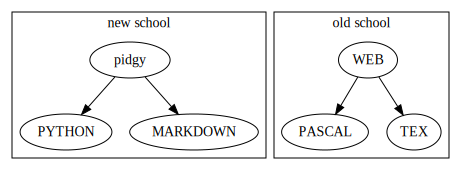

## programming in `markdown and python` 
[📓](translate.ipynb)


    def load_ipython_extension(shell):
        """
The `pidgy` `load_ipython_extension`'s primary function transforms the `jupyter`
`notebook`s into a literate computing interfaces.
`markdown` becomes the primary plain-text format for submitting code,
and the `markdown` is translated to `python` source code
before compilation.
The implementation configures the appropriate
features of the `IPython.InteractiveShell` to accomodate
the interactive literate programming experience.

In this section, we'll implement a `shell.input_transformer_manager`
that handles the logical translation of `markdown` to `python`.
The translation maintains the source line numbers and 
normalizes the narrative relative to the source code.  Consequently,
introduces new syntaxes at the interfaces between `markdown and python`.

        """
        pidgy_transformer = pidgyTransformer()        
        shell.input_transformer_manager = pidgy_transformer
        
        """
`IPython` provides configurable interactive `shell` properties.  Some of the configurable properties
control how `input` code is translated into valid source code. 
The `pidgy` translation is managed by a custom `IPython.core.inputtransformer2.TransformerManager`.
        
        """"""
        >>> shell.input_transformer_manager
        <...pidgyTransformer object...>
        
        """"""

The `shell.input_transformer_manager` applies string transformations to clean up the `input`
to be valid `python`.  There are three stages of line of transforms.

1. Cleanup transforms that operate on the entire cell `input`.

        """"""
        >>> shell.input_transformers_cleanup
        [<...leading_empty_lines...>, <...leading_indent...>, <...PromptStripper...>, ...]
        
        """"""
        
2. Line transforms that are applied the cell `input` with split lines. 
This is where `IPython` introduces their bespoke cell magic syntaxes.
        
        """"""
        >>> shell.input_transformer_manager.line_transforms
        [...<...cell_magic...>...]
        
        """"""
        
3. Token transformers that look for specific tokens at the like level.  `IPython`'s default
behavior introduces new symbols into the programming language.

        """"""
        >>> shell.input_transformer_manager.token_transformers
        [<...MagicAssign...SystemAssign...EscapedCommand...HelpEnd...>]
        
        """"""

After all of the `input` transformations are complete, the `input` should be valid source that `ast.parse, compile or shell.compile` 
may accept.

        """"""
        >>> shell.ast_transformers
        [...]
        
        """

        if not any(x for x in shell.ast_transformers if isinstance(x, ReturnYield)):
            shell.ast_transformers.append(ReturnYield())



    class pidgyTransformer(IPython.core.inputtransformer2.TransformerManager):
        def pidgy_transform(self, cell: str) -> str: 
            tokens = self.tokenizer.parse(''.join(cell))
            return self.tokenizer.untokenize(tokens)
        
        def pidgy_cleanup(self, cell: str) -> list: 
            return self.pidgy_transform(cell).splitlines(True)
        
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.tokenizer = Tokenizer()
            self.cleanup_transforms.insert(0, self.pidgy_cleanup)
            self.line_transforms.append(demojize)

        def pidgy_magic(self, *text): 
            """Expand the text to tokens to tokens and 
            compact as a formatted `"python"` code."""
            return IPython.display.Code(self.pidgy_transform(''.join(text)), language='python')
        



    import ast
    class ReturnYield(ast.NodeTransformer):
        def visit_FunctionDef(self, node): return node
        visit_AsyncFunctionDef = visit_FunctionDef
        def visit_Return(self, node):
            replace = ast.parse('''__import__('IPython').display.display()''').body[0]
            replace.value.args = node.value.elts if isinstance(node.value, ast.Tuple) else [node.value]
            return ast.copy_location(replace, node)

        def visit_Expr(self, node):
            if isinstance(node.value, (ast.Yield, ast.YieldFrom)):  return ast.copy_location(self.visit_Return(node.value), node)
            return node
        
        visit_Expression = visit_Expr



    import mistune as markdown, textwrap, __main__, IPython, typing, re, IPython, nbconvert, ipykernel, doctest, ast
    __all__ = 'pidgy',



    class Tokenizer(markdown.BlockLexer):
            """
### Tokenizer

<details>
<summary>Tokenize `input` text into `"code" and not "code"` tokens that will be translated into valid `python` source.</summary>
        
            """
            class grammar_class(markdown.BlockGrammar):
                doctest = doctest.DocTestParser._EXAMPLE_RE

            def parse(self, text: str, default_rules=None) -> typing.List[dict]:
                if not self.depth: self.tokens = []
                with self: tokens = super().parse(whiten(text), default_rules)
                if not self.depth: tokens = self.compact(text, tokens)
                return tokens

            def parse_doctest(self, m): self.tokens.append({'type': 'paragraph', 'text': m.group(0)})

            def parse_fences(self, m):
                if m.group(2): self.tokens.append({'type': 'paragraph', 'text': m.group(0)})
                else: super().parse_fences(m)

            def parse_hrule(self, m):
                self.tokens.append({'type': 'hrule', 'text': m.group(0)})

            def compact(self, text, tokens):
                """Combine non-code tokens into contiguous blocks."""
                compacted = []
                while tokens:
                    token = tokens.pop(0)
                    if 'text' not in token: continue
                    else: 
                        if not token['text'].strip(): continue
                        block, body = token['text'].splitlines(), ""
                    while block:
                        line = block.pop(0)
                        if line:
                            before, line, text = text.partition(line)
                            body += before + line
                    if token['type']=='code':
                        compacted.append({'type': 'code', 'lang': None, 'text': body})
                    else:
                        if compacted and compacted[-1]['type'] == 'paragraph':
                            compacted[-1]['text'] += body
                        else: compacted.append({'type': 'paragraph', 'text': body})
                if compacted and compacted[-1]['type'] == 'paragraph':
                    compacted[-1]['text'] += text
                elif text.strip():
                    compacted.append({'type': 'paragraph', 'text': text})
                return compacted

            depth = 0
            def __enter__(self): self.depth += 1
            def __exit__(self, *e): self.depth -= 1

            def untokenize(self, tokens: τ.List[dict], source: str = """""", last: int =0) -> str:
                INDENT = indent = base_indent(tokens) or 4
                for i, token in enumerate(tokens):
                    object = token['text']
                    if token and token['type'] == 'code':
                        if object.lstrip().startswith(FENCE):

                            object = ''.join(''.join(object.partition(FENCE)[::2]).rpartition(FENCE)[::2])
                            indent = INDENT + num_first_indent(object)
                            object = textwrap.indent(object, INDENT*SPACE)

                        if object.lstrip().startswith(MAGIC):  ...
                        else: indent = num_last_indent(object)
                    elif not object: ...
                    else:
                        object = textwrap.indent(object, indent*SPACE)
                        for next in tokens[i+1:]:
                            if next['type'] == 'code':
                                next = num_first_indent(next['text'])
                                break
                        else: next = indent       
                        Δ = max(next-indent, 0)

                        if not Δ and source.rstrip().rstrip(CONTINUATION).endswith(COLON): 
                            Δ += 4

                        spaces = num_whitespace(object)
                        "what if the spaces are ling enough"
                        object = object[:spaces] + Δ*SPACE+ object[spaces:]
                        if not source.rstrip().rstrip(CONTINUATION).endswith(QUOTES): 
                            object = quote(object)
                    source += object

                for token in reversed(tokens):
                    if token['text'].strip():
                        if token['type'] != 'code': 
                            source = source.rstrip() + SEMI
                        break

                return source 
            
    for x in "default_rules footnote_rules list_rules".split():
        setattr(Tokenizer, x, list(getattr(Tokenizer, x)))
        getattr(Tokenizer, x).insert(getattr(Tokenizer, x).index('block_code'), 'doctest')
        
    ...
    """
</details>&nbsp;

    """
    pidgy = pidgyTransformer()


A potential outcome of a `pidgy` program is reusable code. 

Import pidgy notebooks as modules.


    class pidgyLoader(__import__('importnb').Notebook): 
        extensions = ".ipynb .md.ipynb".split()
        def code(self, str): return ''.join(pidgy.transform_cell(str))



    class pidgyPreprocessor(nbconvert.preprocessors.Preprocessor):
        def preprocess_cell(self, cell, resources, index, ):
            if cell['cell_type'] == 'code':
                cell['source'] = pidgy_transformer.transform_cell(''.join(cell['source']))
            return cell, resources



    graphviz.Source(
digraph{rankdir=UD 
subgraph cluster_pidgy {label="new school" pidgy->{PYTHON MARKDOWN}}
subgraph cluster_web {label="old school" WEB->{PASCAL TEX} }}
    
    )

In [9]:
## programming in `markdown and python` 
[📓]({{pathlib.Path(translate.__file__).name}})


{{appendix.exports(translate)}}

    graphviz.Source(
digraph{rankdir=UD 
subgraph cluster_pidgy {label="new school" pidgy->{PYTHON MARKDOWN}}
subgraph cluster_web {label="old school" WEB->{PASCAL TEX} }}
    
    )

In [10]:
## testing `"code"` in the `markdown` narrative.
[📔]({{pathlib.Path(testing.__file__).name}})

{{appendix.exports(testing)}}

## testing `"code"` in the `markdown` narrative.
[📔](interactive.md.ipynb)

In literate programs, `"code"` is deeply entangled with the narrative.
`"code"` object can signify meaning and can be validated through testing.
`python` introduced the `doctest` literate programming convention that indicates some text in a narrative can be tested.
`pidgy` extends the `doctest` opinion to the inline markdown code.
Each time a `pidgy` cell is executed, the `doctest`s and inline code are executed ensuring that
any code in a `pidgy` program is valid.



    def post_run_cell(result):
        result.runner = test_markdown_string(result.info.raw_cell, IPython.get_ipython(), False, doctest.ELLIPSIS)

    def load_ipython_extension(shell): 
        unload_ipython_extension(shell)
        shell.events.register('post_run_cell', post_run_cell)



    import doctest, contextlib, mistune as markdown, re, ast, __main__, IPython, operator
    shell = IPython.get_ipython()


`test_markdown_string` extends the standard python `doctest` tools 
to inline code objects written in markdown.  
This approach compliments are markdown forward programming language to test
intertextual references between code and narrative.


    INLINE = re.compile(
        markdown.InlineGrammar.code
        .pattern[1:]
        .replace('[\s\S]*', '?P<source>[\s\S]+')
        .replace('+)\s*', '{1,2})(?P<indent>\s{0})'), 
    )


    (TICK,), SPACE = '`'.split(), ' '



    def test_markdown_string(str, shell=shell, verbose=False, compileflags=None):
        globs, filename = shell.user_ns, F"In[{shell.last_execution_result.execution_count}]"
        runner = doctest.DocTestRunner(verbose=verbose, optionflags=compileflags)  
        parsers = DocTestParser(runner), InlineDoctestParser(runner)
        parsers = {
            parser: doctest.DocTestFinder(verbose, parser).find(str, filename) for parser in parsers
        }
        examples = sum([test.examples for x in parsers.values() for test in x], [])
        examples.sort(key=operator.attrgetter('lineno'))
        with ipython_compiler(shell):
            for example in examples:
                for parser, value in parsers.items():
                    for value in value:
                        if example in value.examples:
                            with parser:
                                runner.run(doctest.DocTest(
                                    [example], globs, value.name, filename, example.lineno, value.docstring
                                ), compileflags=compileflags, clear_globs=False)
        shell.log.info(F"In[{shell.last_execution_result.execution_count}]: {runner.summarize()}")
        return runner



    @contextlib.contextmanager
    def ipython_compiler(shell):
        def compiler(input, filename, symbol, *args, **kwargs):
            nonlocal shell
            return shell.compile(
                ast.Interactive(
                    body=shell.transform_ast(
                        shell.compile.ast_parse(input)
                    ).body
                ),
                F"In[{shell.last_execution_result.execution_count}]",
                "single",
            )

        yield setattr(doctest, "compile", compiler)
        try:
            doctest.compile = compile
        except:
            ...



In [11]:
## Weaving the `markdown` to a rich display.
[📗]({{pathlib.Path(exports.__file__).name}})

{{appendix.exports(exports)}}

## Weaving the `markdown` to a rich display.
[📗](exports.md.ipynb)

This is the weaving step.



    import datetime, dataclasses, sys, IPython as python, IPython, nbconvert as export, collections, IPython as python, mistune as markdown, hashlib
    exporter, shell = export.exporters.TemplateExporter(), python.get_ipython()
    modules = lambda:[x for x in sys.modules if '.' not in x and not str.startswith(x,'_')]



      File "<ipython-input-2-4f35fb6ae506>", line 1
        Markdown input can fail to render when jinja2 is used in correctly.  Markdown is never wrong, but sometimes jinja is.
                     ^
    SyntaxError: invalid syntax




    @dataclasses.dataclass
    class Metadata:
        def pre_run_cell(self, info):
            self.modules = modules()
            self.start = datetime.datetime.utcnow().isoformat()
            if hasattr(self.shell, 'user_ns'):
                self.ns = self.names()
            
            return info
        
        def names(self):
            return [x for x in self.shell.user_ns if x[0].islower()]

        def post_run_cell(self, result):
            text = result.info.raw_cell
            lines = text.splitlines() or ['']
            if lines[0].strip(): 
                exporter.environment.filters.update({
                    k: v for k, v in self.shell.user_ns.items() if callable(v) and k not in exporter.environment.filters})
                try:
                    text = exporter.environment.from_string(text, globals=IPython.get_ipython().user_ns).render()
                except BaseException as Exception:
                    shell.showtraceback((type(Exception), Exception, Exception.__traceback__))
                    
                IPython.display.display(IPython.display.Markdown(text, metadata=dict(
                    modules=[x for x in modules() if x not in self.modules], 
                    names=[x for x in self.names() if x not in self.ns],
                    start_time=self.start,
                    end_time=datetime.datetime.utcnow().isoformat(),
                    #id=hashlib.sha256(bytes(id(self.shell))).hexdigest(),
                )))
            return result
        shell: python.InteractiveShell = dataclasses.field(default_factory=python.get_ipython)
        start: datetime.datetime = dataclasses.field(init=False)
        modules: list = dataclasses.field(default_factory=list)
        ns: list = lambda self: [x for x in self.shell.user_ns if '.' not in x and not str.startswith(x,'_')]



## `pidgy` metasyntax at language interfaces.
[📗]({{pathlib.Path(syntax.__file__).name}})

The combinations of document, programming, and templating languages
provides unique syntaxes as the interfaces.

{{appendix.exports(syntax)}}

### Reusing `pidgy` documents.

Notebooks gain value when they be reusable at rest.

We'll make a cli application that deploys `pidgy` as a web, cli, converter.


{{appendix.exports(cli)}}

In [19]:
    
    def unload_ipython_extension(shell):
        for x in (exports, testing, imports): x.unload_ipython_extension(shell)

In [20]:
    
    if __name__ == '__main__':
        !jupyter nbconvert --to markdown --TemplateExporter.exclude_input=True --stdout paper.md.ipynb > readme.md
    ...;

[NbConvertApp] Converting notebook paper.md.ipynb to markdown
